# **Diabetes Predition Models**

Group members: Yu Wang, Yuhao Sun


## Introduction

Diabetes occurs our bodies can't properly produce insulin, which is a hormone that regulates blood sugar levels. Diabetes leads to high levels of glucose in the blood, and causes health problems like cardiovascular disease, nerve damage, and kidney damage. Diabetes is a major health issue worldwide, thus, developing a model that can accurately predict diabetes can help healthcare professionals predict which patient is at risk, and provide early interventions. 

We are inspired by the self-test webpage on the American Diabetes Association website which has a self-test model that can predict the likelihood of developing type 2 diabetes. Also, we found a dataset that fits our goal with abundant data records from [BRFSS](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system). We hope to test multiple models to come up with an accurate and efficient model that can better predict diabetes, ultimately improving the patient outcomes and reducing healthcare costs.



<img align="center" src = "https://domf5oio6qrcr.cloudfront.net/medialibrary/10051/diabetes-and-healthy-lifestyle.jpg" width= "400"/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/Shareddrives/CIS545 Final Project/Code

/content/drive/Shareddrives/CIS545 Final Project/Code


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 
#from pandas_profiling import Profile Report
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE

#from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

### Load Data

The Behavioral Risk Factor Surveillance System Survey dataset was collected from 2011 to 2015, and it contains a vast collection of health-related data from approximately 400k individuals. The dataset was conducted by CDC and it was collected through a randomized telephone survey of adults, and it is the only available source of timely accurate data on health related behaviors.

In [ ]:
full_data_raw = pd.read_csv('Diabetes_Data/2015.csv')

full_data_raw.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
5,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0
6,1.0,1.0,b'01052015',b'01',b'05',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,1.0
7,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,b'01132015',b'01',b'13',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
9,1.0,1.0,b'01302015',b'01',b'30',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0


#### Preprocessing / Learning our dataset


Before we begin cleaning and conducting exploratory analysis on the CDC dataset, the first thing to do is evaluate the usability of the dataset. Specifically, we need to examine the diabetes column to ensure it contains the appropriate data for our analysis.  

The description of the DIABETE3 column is 

```
'(Ever told) you have diabetes ?
(If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If
Respondent says pre-diabetes or borderline diabetes, use response code 4.)'

Values in this column are
1: YES
2: YES, but female told only during pregnancy
3: NO
4: No, pre-diabetes or borderline diabetes
7: Don’t know/Not Sure
9: Refused
```


In [ ]:
full_data_raw.groupby(['DIABETE3']).size()

DIABETE3
1.0     57256
2.0      3608
3.0    372104
4.0      7690
7.0       598
9.0       193
dtype: int64

it appears that there are 57,256 individuals in the dataset who have reported that they have diabetes. Additionally, there are 3,608 pregnant females with diabetes, 7,690 individuals with pre-diabetes or borderline diabetes, and 372,104 observations in which the respondents indicated that they do not have diabetes.

Since the majority of the respondents indicated that they do not have diabetes, we can select the diabetic and non-diabetic respondents to create a balanced dataframe in the later parts and use that to fit our models. 



An important factor to consider when studying diabetic patients is their sex. Therefore, during the preprocessing step, it is essential to ensure that the sex column is usable and contains accurate and complete data.

In [ ]:
full_data_raw.groupby(['SEX']).size()

SEX
1.0    186938
2.0    254518
dtype: int64

One potential analysis can be performed on diabetic and non-diabetic groups is using the sex of the CDC data responder as a differentiating factor. Since the dataset contains 300k non-null value rows, which is enough data to be used for this purpose.

The raw CDC health data contains 300+ columns, a lot of them are not interesting to us. We are going to select a couple of columns related to diabetes. 

we selected a subset of relevant columns from the dataset. These columns focused on health-related habits and conditions typically mentioned during diabetes testing, such as smoking status, weight, age, BMI, cholesterol levels, and heart health, etc.



In [ ]:
#trim the data to by selecting the columns we need
full_data_raw = full_data_raw[['_RFHYPE5','DIABETE3','BPHIGH4','WTCHSALT','TOLDHI2','_RFDRHV5','_CHOLCHK','MENTHLTH', '_BMI5','CVDSTRK3', '_VEGLT1','_MICHD','HLTHPLN1',
                               'GENHLTH', 'MEDCOST','SEX', 'PHYSHLTH', 'BLOODCHO','DIFFWALK','_AGEG5YR', 'INCOME2','EDUCA' ,'CHCOCNCR','CHECKUP1','_FRTLT1',   'MARITAL', 
                               'SMOKE100','ADSLEEP','EMPLOY1','_TOTINDA','WEIGHT2', 'CHCKIDNY', 'LMTJOIN3','PERSDOC2']]

# variable explaination: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
#CHECKUP1 : About how long has it been since you last visited a doctor for a routine checkup? 1: past year, 2: 2yrs, 3: 5yrs, 4: more 
#: EMPLOY1 :  Are you currently… : 1:employed, 2:self employed, 3,4: outof work, 5: homeworker,: 6: student, 7:retired, 8: unable to work
#EXRACT11: What type of physical activity or exercise did you spend the most time doing during the past month?
#: DIABEYE: Has a doctor ever told you that diabetes has affected your eyes or that you had retinopathy? : 1:yes, 2:no
# Part of the preprcoessing technique is referenced from https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook

In [ ]:
full_data_raw.head()

,_RFHYPE5,DIABETE3,BPHIGH4,WTCHSALT,TOLDHI2,_RFDRHV5,_CHOLCHK,MENTHLTH,_BMI5,CVDSTRK3,...,_FRTLT1,MARITAL,SMOKE100,ADSLEEP,EMPLOY1,_TOTINDA,WEIGHT2,CHCKIDNY,LMTJOIN3,PERSDOC2
0,2.0,3.0,1.0,NaN,1.0,1.0,1.0,18.0,4018.0,2.0,...,2.0,1.0,1.0,NaN,8.0,2.0,280.0,2.0,1.0,1.0
1,1.0,3.0,3.0,2.0,2.0,1.0,2.0,88.0,2509.0,2.0,...,2.0,2.0,1.0,NaN,3.0,1.0,165.0,2.0,NaN,1.0
2,1.0,3.0,3.0,NaN,1.0,9.0,1.0,88.0,2204.0,1.0,...,9.0,2.0,NaN,NaN,7.0,9.0,158.0,2.0,NaN,2.0
3,2.0,3.0,1.0,2.0,1.0,1.0,1.0,30.0,2819.0,2.0,...,1.0,1.0,2.0,NaN,8.0,2.0,180.0,2.0,1.0,2.0
4,1.0,3.0,3.0,1.0,2.0,1.0,1.0,88.0,2437.0,2.0,...,9.0,1.0,2.0,NaN,8.0,2.0,142.0,2.0,1.0,1.0


In [ ]:
full_data_raw = full_data_raw.drop('ADSLEEP', axis =1)

By viewing the first 5 rows, we found out that ADSLEEP, LMTJOIN3, WTCHSALT, CHCKIDNY are not invaliad due to NaNs, We will drop these columns.

In [ ]:
# remove unwanted columns
full_data_raw = full_data_raw[['DIABETE3','_RFHYPE5','TOLDHI2', '_CHOLCHK','_BMI5','SMOKE100','CVDSTRK3', 'EMPLOY1','WEIGHT2','PERSDOC2','LMTJOIN3', 'WTCHSALT','_MICHD', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2','CHECKUP1', 'MARITAL' ]]

check the dataframe again

In [ ]:
full_data_raw.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,EMPLOY1,WEIGHT2,PERSDOC2,...,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2,CHECKUP1,MARITAL
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,8.0,280.0,1.0,...,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0,1.0,1.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,3.0,165.0,1.0,...,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0,4.0,2.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,7.0,158.0,2.0,...,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0,1.0,2.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,8.0,180.0,2.0,...,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0,1.0,1.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,8.0,142.0,1.0,...,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0,1.0,1.0


drop these unwanted columns

In [ ]:
full_data_raw = full_data_raw.drop(['PERSDOC2','LMTJOIN3', 'WTCHSALT'], axis=1)

After selected the columns that we need, we want to see what are the unique values in each of the columns

In [ ]:
#get all the columns in the dataframe
columns = full_data_raw.columns

#print out the unique values in each feature
for item in columns:
  print(f'{item} unique inputs= {np.sort(full_data_raw[item].unique())}')


DIABETE3 unique inputs= [ 1.  2.  3.  4.  7.  9. nan]
_RFHYPE5 unique inputs= [1. 2. 9.]
TOLDHI2 unique inputs= [ 1.  2.  7.  9. nan]
_CHOLCHK unique inputs= [1. 2. 3. 9.]
_BMI5 unique inputs= [1202. 1205. 1211. ... 9765. 9995.   nan]
SMOKE100 unique inputs= [ 1.  2.  7.  9. nan]
CVDSTRK3 unique inputs= [1. 2. 7. 9.]
EMPLOY1 unique inputs= [1. 2. 3. 4. 5. 6. 7. 8. 9.]
WEIGHT2 unique inputs= [  50.   52.   53.   55.   57.   58.   59.   60.   61.   62.   63.   64.
   65.   66.   68.   69.   70.   71.   72.   73.   74.   75.   76.   77.
   78.   79.   80.   81.   82.   83.   84.   85.   86.   87.   88.   89.
   90.   91.   92.   93.   94.   95.   96.   97.   98.   99.  100.  101.
  102.  103.  104.  105.  106.  107.  108.  109.  110.  111.  112.  113.
  114.  115.  116.  117.  118.  119.  120.  121.  122.  123.  124.  125.
  126.  127.  128.  129.  130.  131.  132.  133.  134.  135.  136.  137.
  138.  139.  140.  141.  142.  143.  144.  145.  146.  147.  148.  149.
  150.  151.  152.  15

By viewing the unique values in each feature, we found out that there are a few NaNs left in the weights, diabetes, toldhi2, bmi, smoke, medcost, general health, physical health, difficulty walking, income. 

In [ ]:
#drop na
full_data_select = full_data_raw.dropna()

##### Remove Unwanted Values In Each Column

since the data are based on surveys, there are a couple of answers are invalid to our analysis. For example, '7' represents 'Don't know', and '9' represents 'refused to answer'. 

By reading the variable explaination codebook, we found out that the variables contain multiple categories, which makes the work more difficult for us, we decided to combine categories such that: '0' would represent 'No', and '1' would represent 'Yes' for most of the variables.  

Regroup observations in each feature part1

In [ ]:
#covert specific variables to suit what we need based on the codebook from the cdc. 

#remove value of 7,9 because they represent refused to answer and don't know

#convert body mass index to %
full_data_select['_BMI5'] = full_data_select['_BMI5'].div(100).round(0)

#stroke
full_data_select= full_data_select[~full_data_select['CVDSTRK3'].isin([9,7])]
full_data_select  = full_data_select.replace({'CVDSTRK3': {2: 0}})

# high cholesterol
full_data_select= full_data_select[~full_data_select['TOLDHI2'].isin([7,9])]
full_data_select  = full_data_select.replace({'TOLDHI2': {2: 0}})

#last choleserol visit
full_data_select= full_data_select[~full_data_select['_CHOLCHK'].isin([9])]
full_data_select  = full_data_select.replace({'_CHOLCHK': {2: 0, 3:0}})


#health care
full_data_select= full_data_select[~full_data_select['HLTHPLN1'].isin([9,7])]
full_data_select  = full_data_select.replace({'HLTHPLN1': {2: 0}})

#smoking habit
full_data_select= full_data_select[~full_data_select['SMOKE100'].isin([9,7])]
full_data_select  = full_data_select.replace({'SMOKE100': {2: 0}})



# coronary heart disease
full_data_select['_MICHD'] = full_data_select['_MICHD'].replace({2: 0})

#blood pressure modification
full_data_select= full_data_select[~full_data_select['_RFHYPE5'].isin([9])]
full_data_select  = full_data_select.replace({'_RFHYPE5': {2: 1, 1:0}})

#general health
full_data_select= full_data_select[~full_data_select['GENHLTH'].isin([9,7])]

#vege cosumption
full_data_select= full_data_select[~full_data_select['_VEGLT1'].isin([9])]
full_data_select  = full_data_select.replace({'_VEGLT1': {2: 0}})

#exersise
full_data_select= full_data_select[~full_data_select['_TOTINDA'].isin([9])]
full_data_select  = full_data_select.replace({'_TOTINDA': {2: 0}})

#drinking
full_data_select= full_data_select[~full_data_select['_RFDRHV5'].isin([9])]
full_data_select  = full_data_select.replace({'_RFDRHV5': {1:0, 2: 0}})

<ipython-input-72-4064630d9f1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_select['_BMI5'] = full_data_select['_BMI5'].div(100).round(0)




---



Regroup observations in each feature part2

In [ ]:


#walking difficulty
full_data_select= full_data_select[~full_data_select['DIFFWALK'].isin([9,7])]
full_data_select  = full_data_select.replace({'DIFFWALK': {2: 0}})

#fruit consumption
full_data_select= full_data_select[~full_data_select['_FRTLT1'].isin([9])]
full_data_select  = full_data_select.replace({'_FRTLT1': {2: 0}})


#age category
full_data_select = full_data_select[full_data_select._AGEG5YR != 14]

#cost of doc visit
full_data_select= full_data_select[~full_data_select['MEDCOST'].isin([7,9])]
full_data_select  = full_data_select.replace({'MEDCOST': {2: 0}})

#sex
full_data_select['SEX'] = full_data_select['SEX'].replace({2:0})
#mental health
full_data_select= full_data_select[~full_data_select['MENTHLTH'].isin([77,99])]
full_data_select  = full_data_select.replace({'MENTHLTH': {88: 0}})

#physical health
full_data_select= full_data_select[~full_data_select['PHYSHLTH'].isin([77,99])]
full_data_select  = full_data_select.replace({'PHYSHLTH': {88: 0}})

#diabetes condition modification
full_data_select= full_data_select[~full_data_select['DIABETE3'].isin([7,9])]
full_data_select  = full_data_select.replace({'DIABETE3': {2:0, 3:0, 1:2, 4:1}})

#education
full_data_select = full_data_select[full_data_select.EDUCA != 9]

#income
full_data_select= full_data_select[~full_data_select['INCOME2'].isin([77,99])]

In [ ]:
full_data_select.dtypes

DIABETE3    float64
_RFHYPE5    float64
TOLDHI2     float64
_CHOLCHK    float64
_BMI5       float64
SMOKE100    float64
CVDSTRK3    float64
EMPLOY1     float64
WEIGHT2     float64
_MICHD      float64
_TOTINDA    float64
_FRTLT1     float64
_VEGLT1     float64
_RFDRHV5    float64
HLTHPLN1    float64
MEDCOST     float64
GENHLTH     float64
MENTHLTH    float64
PHYSHLTH    float64
DIFFWALK    float64
SEX         float64
_AGEG5YR    float64
EDUCA       float64
INCOME2     float64
CHECKUP1    float64
MARITAL     float64
dtype: object

##### Renaming Variables For Readability

Some of the variables giving us a hard to read and understand what they are, we decided to expand these code names to make them easier to read.

rename variables part1

In [ ]:
#convert columns names for readbiliy 
full_data = full_data_select.rename(columns = {'DIABETE3':'Diabetes_012', 
                                         'TOLDHI2':'High_cholesterol', 'SMOKE_more100':'Heavy_Smoker','_CHOLCHK':'last_Cholesterol_Check', '_RFHYPE5':'High_Blood_pressure', 
                                         '_BMI5':'BMI_idex','CHECKUP1': 'last_visit','MEDCOST':'Visit_cost',
                                         'CVDSTRK3':'Stroke_history', 'GENHLTH':'general_health', 
                                         '_TOTINDA':'Exercise_amount','PHYSHLTH':'physical health' })

In [ ]:
full_data.head()

,Diabetes_012,High_Blood_pressure,High_cholesterol,last_Cholesterol_Check,BMI_idex,SMOKE100,Stroke_history,EMPLOY1,WEIGHT2,_MICHD,...,general_health,MENTHLTH,physical health,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2,last_visit,MARITAL
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,8.0,280.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,3.0,165.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4.0,2.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,8.0,180.0,0.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,1.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,2.0,145.0,0.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,3.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,7.0,148.0,0.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0,3.0


rename variables part2: Since there are still a few features that have confusing names. 

In [ ]:
full_data = full_data.rename(columns = {
                                          '_VEGLT1':"Vegetables_consumption", 
                                         '_RFDRHV5':'highAlcoholConsump', '_MICHD':'Heart Disease_history',
                                        'EDUCA':'Education_level',  '_FRTLT1':'Fruit_consumption',
                                           'DIFFWALK':'Difficulty_walking', 'MENTHLTH':'Mental_health', 
                                          '_AGEG5YR':'Age',  'HLTHPLN1':'have_Healthcare' ,'INCOME2':'Income',  'EMPLOY1':'employment_stats','EXRACT11':'exersice', 'DIABEYE':'eye_problem_diabetes' })

In [ ]:
full_data.head()

,Diabetes_012,High_Blood_pressure,High_cholesterol,last_Cholesterol_Check,BMI_idex,SMOKE100,Stroke_history,employment_stats,WEIGHT2,Heart Disease_history,...,general_health,Mental_health,physical health,Difficulty_walking,SEX,Age,Education_level,Income,last_visit,MARITAL
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,8.0,280.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,3.0,165.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4.0,2.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,8.0,180.0,0.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,1.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,2.0,145.0,0.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,3.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,7.0,148.0,0.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0,3.0


##### Convert Dependent Variable To Binary 

We are going to combine a few diabetic conditions into two groups: diabetic (1) and non-diabetic (0). We Changed diabetics represented by '2' to '1' and pre-diabetics represented by '1' to '0'. Therefore, we only have two types of answers in our dependent variable.

In [ ]:
# change our dependent variable: diabetes to be 0: non-diabetic, 1: diabetic
diabetes_df = full_data
diabetes_df['Diabetes_012'] = diabetes_df['Diabetes_012'].replace({1:0})
diabetes_df['Diabetes_012'] = diabetes_df['Diabetes_012'].replace({2:1})

#Change name to Diabetes_binary
diabetes_df = diabetes_df.rename(columns = {'Diabetes_012': 'Diabetes_binary'})

In [ ]:
# check if we have successfully convert all the values to 0s and 1s
diabetes_df.Diabetes_binary.unique()

array([0., 1.])

In [ ]:
# check the size of each diabetes group
diabetes_df.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64

It can be observed that the dataset is imbalanced as the amount of non-diabetes records is higher than the amount of diabetes records. We need further processing technique to deal with the imbalance problem before modeling it with machine learning models.

### EDA

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics often with visual methods, which also provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques we are considering for data analysis are appropriate.

Since we have a large dataset with about 70k data records and 26 features, it is a good idea to explore the dataset to see if we can gain any insight on their correlation and distribution.

#### Understanding Data

To get a basic understanding of our dataset, we can first try directly printing it out and observe each column values and meanings. Moreover, we can check each column's data type through the `.info()` command and statistics thorugh the `.describe()` command as shown below. 

In [ ]:
diabetes_df.head(5)

,Diabetes_binary,High_Blood_pressure,High_cholesterol,last_Cholesterol_Check,BMI_idex,SMOKE100,Stroke_history,employment_stats,WEIGHT2,Heart Disease_history,...,general_health,Mental_health,physical health,Difficulty_walking,SEX,Age,Education_level,Income,last_visit,MARITAL
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,8.0,280.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,3.0,165.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4.0,2.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,8.0,180.0,0.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,1.0
5,0.0,1.0,0.0,1.0,27.0,0.0,0.0,2.0,145.0,0.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,3.0
6,0.0,1.0,1.0,1.0,24.0,0.0,0.0,7.0,148.0,0.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0,3.0


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 441455
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Diabetes_binary         253680 non-null  float64
 1   High_Blood_pressure     253680 non-null  float64
 2   High_cholesterol        253680 non-null  float64
 3   last_Cholesterol_Check  253680 non-null  float64
 4   BMI_idex                253680 non-null  float64
 5   SMOKE100                253680 non-null  float64
 6   Stroke_history          253680 non-null  float64
 7   employment_stats        253680 non-null  float64
 8   WEIGHT2                 253680 non-null  float64
 9   Heart Disease_history   253680 non-null  float64
 10  Exercise_amount         253680 non-null  float64
 11  Fruit_consumption       253680 non-null  float64
 12  Vegetables_consumption  253680 non-null  float64
 13  highAlcoholConsump      253680 non-null  float64
 14  have_Healthcare     

In [ ]:
diabetes_df.describe()

,Diabetes_binary,High_Blood_pressure,High_cholesterol,last_Cholesterol_Check,BMI_idex,SMOKE100,Stroke_history,employment_stats,WEIGHT2,Heart Disease_history,...,general_health,Mental_health,physical health,Difficulty_walking,SEX,Age,Education_level,Income,last_visit,MARITAL
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,3.794781,192.760080,0.094186,...,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,1.425374,2.032210
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,2.873266,320.484699,0.292087,...,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.997636,1.511446
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,65.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,1.000000,150.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,2.000000,175.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,7.000000,205.000000,0.000000,...,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,9.000000,9280.000000,1.000000,...,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,9.000000,9.000000


#### Correlation of Feature Variables

With all the 26 features in the original data, we would like to explore the correlation between those features to gain some insight on the degree of the linear relationship between variables in the dataset. The correlation coefficient shows how strongly or weakly any two variables are related. Score 1 indicates a perfect positive correlation, whereas -1 indicates a perfect negative correlation. Scores closer to 0 indicate a weak correlation.

Text(0.5, 1.0, 'correlation of feature')

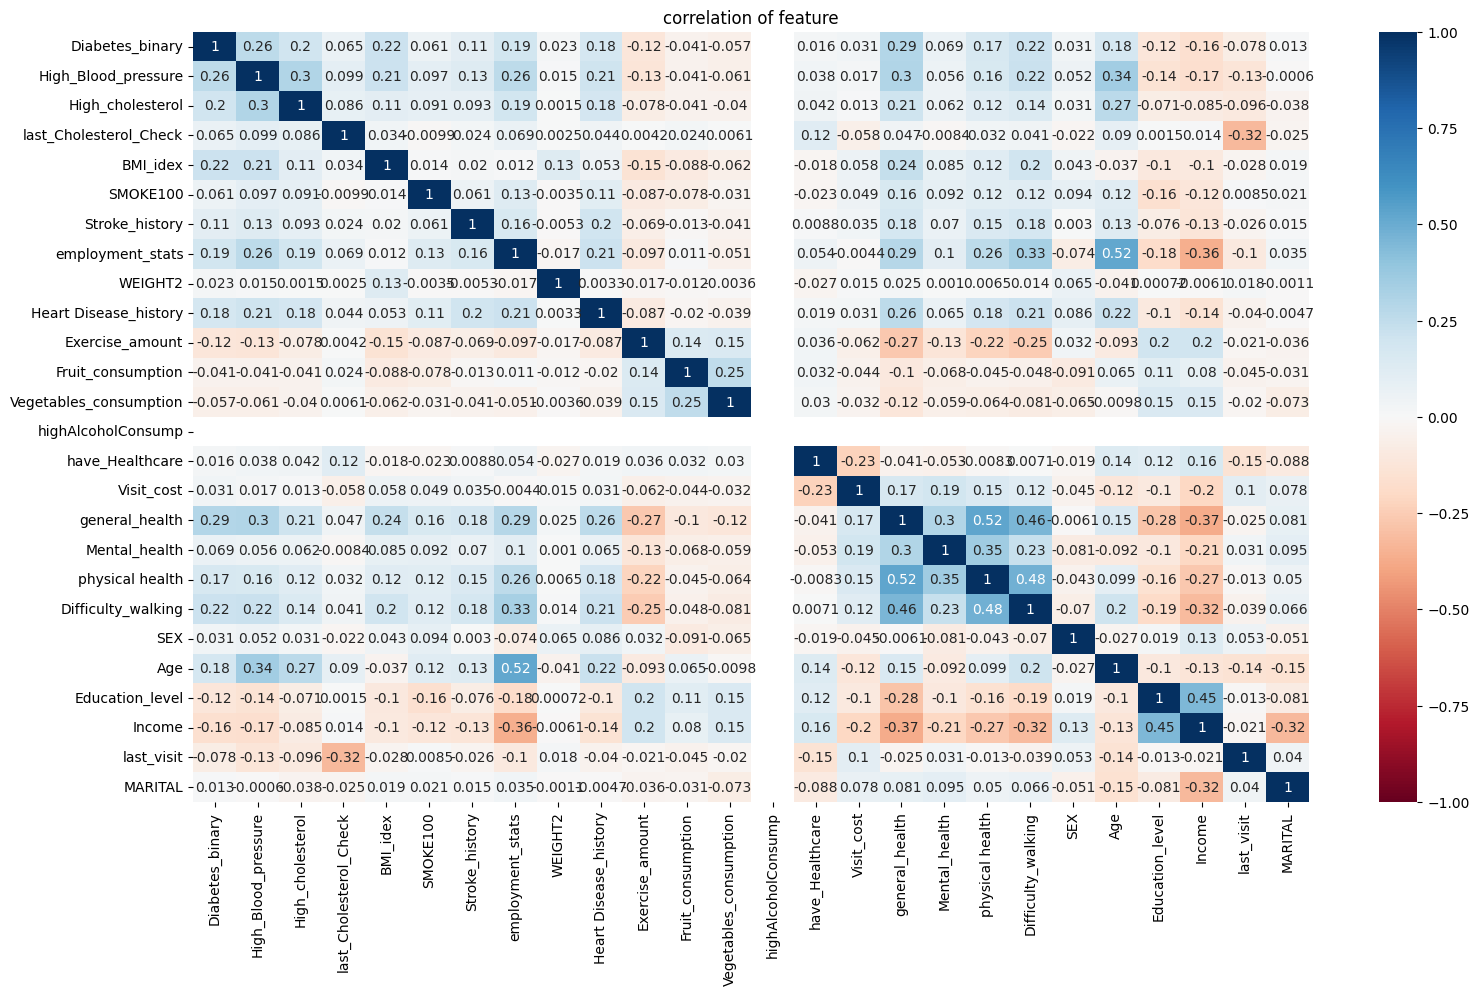

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("correlation of feature")

First we can observe that the target variable `Diabetes_binary` has the highest correlation with `GenHlth` (0.407612), followed by `Age` (0.278738), `DiffWalk` (0.272646), and `HighBP` (0.381516). It might indicate that people with poor general health status, high blood pressure, older age and difficulty walking tend to have high probability of diabetes symptom. On the other hand, `Diabetes_binary` has a negative correlation between `Income`, `Education` and `Exercise`, which might indicate people with higher income, higher level of education and more exercise tend to have a lower probability of diabetes symptoms.

Secondly, there are some correlations between other variables such as `Education` and `Income` (0.460565), `PhysHlth` and `GenHlth` (0.552757), `PhysHlth` and `DiffWalk` (0.487976), which may indicate some multicollinearity. We should be cautious about using these variables in a predictive model.

The correlation between `Diabetes_binary` and some variables like `CholCheck`, `Smoker`, and `Sex` is relatively weak. These variables might not have a strong impact on predicting diabetes. Also it can be noted that the correlation between feature `highAlcoholConsump` and any other features are zero. From further exploration we find that the feature `highAlcoholConsump` are all zero values, so we decide to drop this column as it doesn't contribute to our modeling prediction.

#### Correlation of `Diabetes_binary` label with all other attributes
To better understand the relationship of the target attribute `Diabetes_binary` we extract the relation of only `Diabetes_binary` w.r.t all other attributes and show the correlation plot ordered by the correlation coefficient as below.

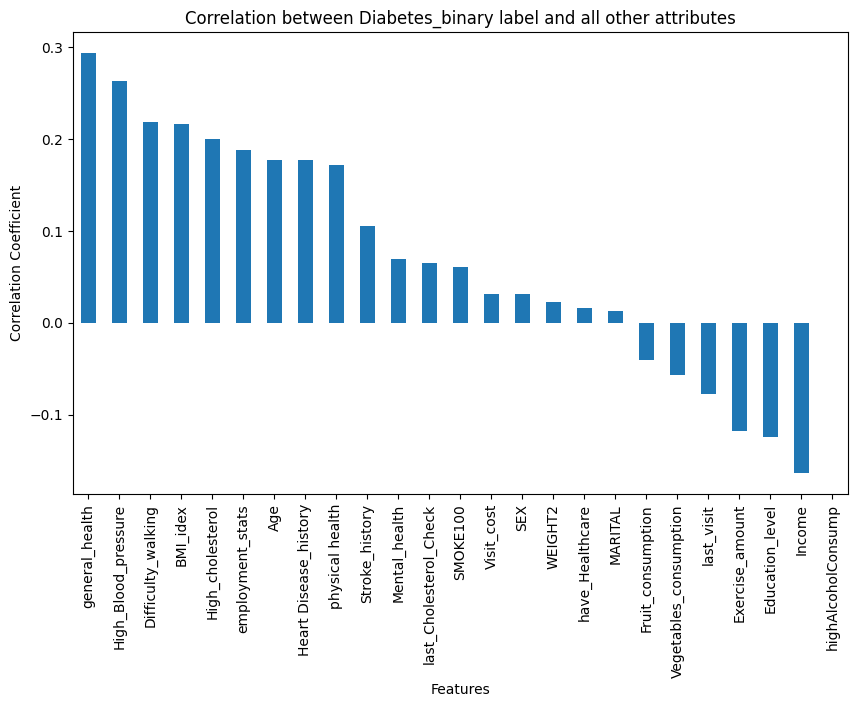

In [ ]:
# Extract the correlations with 'Diabetes_binary'
diabetes_other_correlations = diabetes_df.corr()['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
diabetes_other_correlations.plot(kind='bar')
plt.title('Correlation between Diabetes_binary label and all other attributes')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

#### Distribution of Diabetes and Non-Diabetes in each Age Range

The age distribution in our dataset ranges from 18 to 80+ that covers most part of the population. We are interested to explore the number of Diabetes and Non-Diabetes population in each age range to investiagte their relationship.

To do this, we need to map the original `Age` column which represents age index to real age values s.t. index 1 is 18~24, and all the way up to 80+ in 5 years increment.

Original unique age index:  [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]


<ipython-input-87-d24849b1ab87>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_age_df['Age'] = diabetes_df['Age'].apply(lambda x: age_dict[x])
<ipython-input-87-d24849b1ab87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_age_df['Diabetes_binary'] = diabetes_df['Diabetes_binary'].apply(lambda x: 'Diabetes' if x==1 else 'Non-Diabetes')
<ipython-input-87-d24849b1ab87>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Text(0.5, 1.0, 'Number of Diabetes and Non-Diabetes in each Age Range')

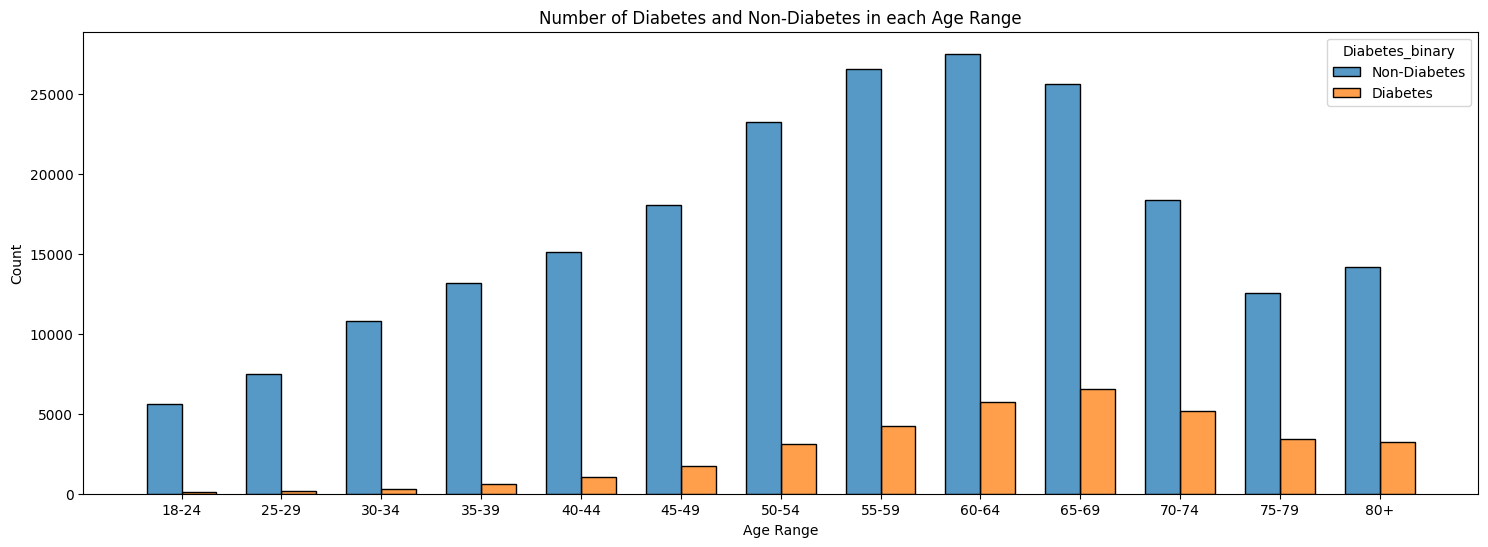

In [ ]:
# Original unique age index
print('Original unique age index: ', diabetes_df['Age'].unique())

# Map age index to real age values
age_dict = {1:"18-24", 2:"25-29", 3:"30-34", 4:"35-39", 5:"40-44", 6:"45-49", 7:"50-54", 8:"55-59", 9:"60-64", 10:"65-69", 11:"70-74", 12:"75-79", 13:"80+"}
diabetes_age_df = diabetes_df[['Diabetes_binary','Age']]
diabetes_age_df['Age'] = diabetes_df['Age'].apply(lambda x: age_dict[x])
diabetes_age_df['Diabetes_binary'] = diabetes_df['Diabetes_binary'].apply(lambda x: 'Diabetes' if x==1 else 'Non-Diabetes')
diabetes_age_df['Age'] = pd.Categorical(diabetes_age_df['Age'], list(age_dict.values()))
# Plot 
plt.figure(figsize=(18,6))
g = sns.histplot(data=diabetes_age_df, x="Age", hue="Diabetes_binary", multiple="dodge", shrink=0.7)
plt.xlabel('Age Range')
plt.title('Number of Diabetes and Non-Diabetes in each Age Range')

Accoring to the plot of number of diabetes vs. age range we can observe 
that the diabetes symptom is more common among older people (age > 60) where the ratio of people with diabetes exceeds 50%. Also, as the age increases from 18~24 to 80+, the ratio of diabetes over non-diabetes is also increasing. It provides a valuable insight when predicting whether one has diabetes or not given this person's age value. 

We can also explore the number of people in each age range which is show below. Among all the age ranges, most people lies within the 55~74 ranges which implies that most of the participant in the survey are also elder people.

Text(0.5, 1.0, 'Number of people in each age range')

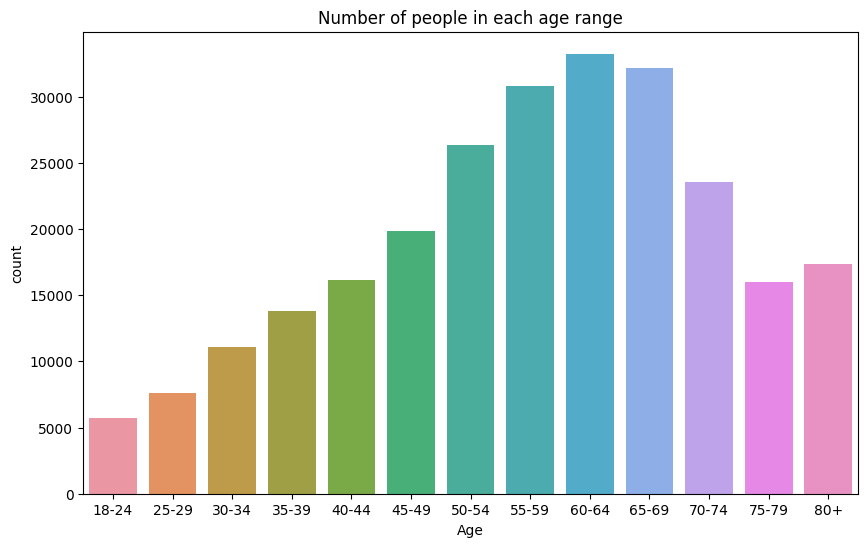

In [ ]:
plt.figure(figsize=(10,6))
age_plot = sns.countplot(data=diabetes_age_df, x='Age')
plt.title('Number of people in each age range')

#### Diabetes Patients Health Conditions 

To compare the health conditions of diabetic and non-diabetic patients, we split the data into two groups based on the response in the `Diabetes_binary` column. Then, we aggregate the health condition-related columns by summing the values in each column separately for each group. This will allow us to compare the total number of cases of each health condition for diabetic and non-diabetic patients, and help us understand how the health conditions of these two groups differ.

In [ ]:
colors = ['#d6604d','#2166ac']
# Function to plot a categorical variable against the number of diabetic cases
def plot_categorical(var):
    # Group the data by the variable and diabetes status, and calculate the sum of cases
    ctc = diabetes_df.groupby([var, 'Diabetes_binary'])['Diabetes_binary'].count().unstack()
    ctc = ctc[[1, 0]]  # Reorder the columns to put diabetic cases first

    # Plot a stacked horizontal bar chart of the counts
    fig, ax = plt.subplots(figsize=(4,4))
    ctc.plot(kind='bar', color=colors,stacked=True,  ax=ax)
    
    # Set labels, title,legend for the charts
    ax.set_xlabel('Health Condition')
    ax.set_ylabel('Number of Cases')
    ax.set_title('Number of Cases by Diabetes Status and ' + str(var), fontsize=10)
    ax.legend(['Diabetes', 'Non-Diabetic'], bbox_to_anchor=(1, 1), loc='upper left', fontsize=6)

    # Show the plot
    plt.show()

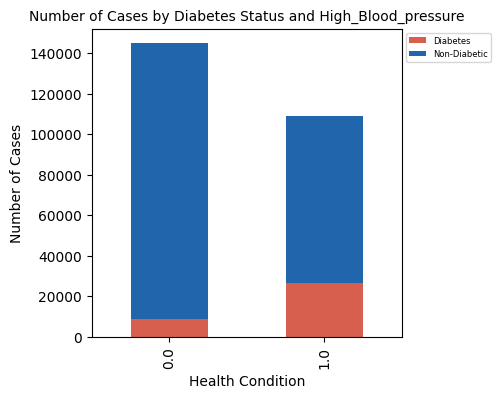

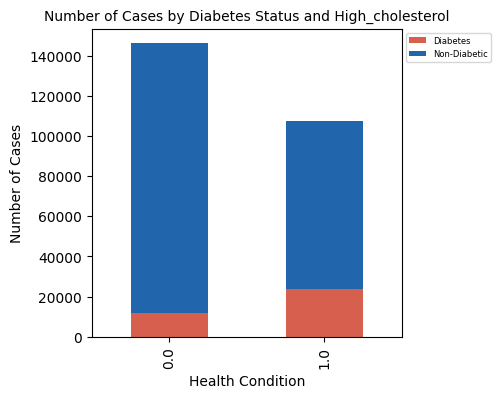

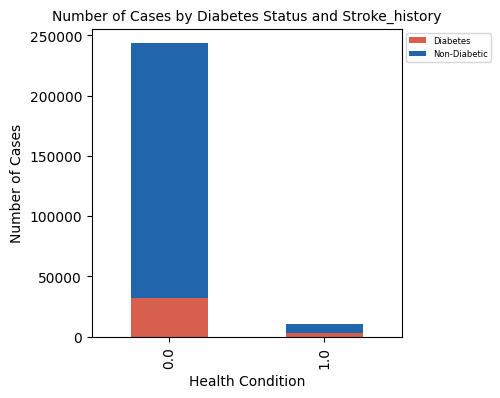

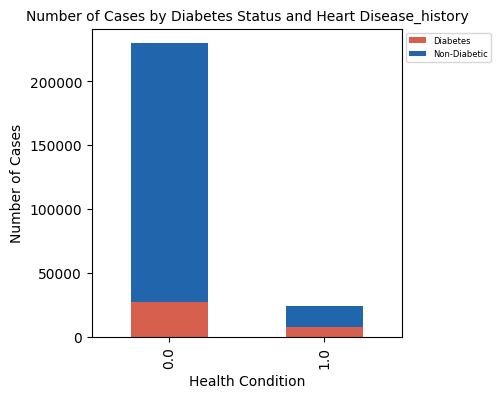

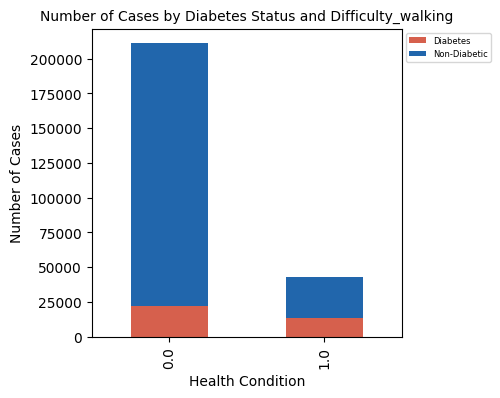

In [ ]:
# some of the boolean variables are not related to patient physical conditions, select related columns only
EDA_bools = ['High_Blood_pressure', 'High_cholesterol',  'Stroke_history', 'Heart Disease_history', "Difficulty_walking"]

#plot bool variables 
for variables in EDA_bools:
    plot_categorical(variables)


Based on the charts, we got an initial idea of what health conditions are related with diabetes patients, the marjority of people identified as having diabetes also experienced or having high blood pressure, high cholesterol. 


#### Relation between BMI and diabetes

According to the documentation [page](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html) from CDC, **Body Mass Index (BMI)** is defined as a person’s weight in kilograms (or pounds) divided by the square of height in meters (or feet). Since BMI is a very common index to evaluate one's health status, we would like to explore it relationship with the diabetes symptom in our dataset.

According to the CDC page, we can interpret the value of BMI from table below

| BMI           | Weight Status  |
| -----------   | -----------    |
| Below 18.5    | Underweight    |
| 18.5 – 24.9   | Healthy Weight |
| 25.0 – 29.9   | Overweight     |
| 30.0 and Above| Obesity        |

<ipython-input-91-5cac6b80df0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_diabetes_df['BMI_index'] = bmi_diabetes_df['BMI_idex'].astype(int)
<ipython-input-91-5cac6b80df0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_diabetes_df['Diabetes_binary'] = bmi_diabetes_df['Diabetes_binary'].apply(lambda x: 'Diabetes' if x==1 else 'Non-Diabetes')


Text(0.5, 1.0, 'Distribution of Diabetes in each BMI range')

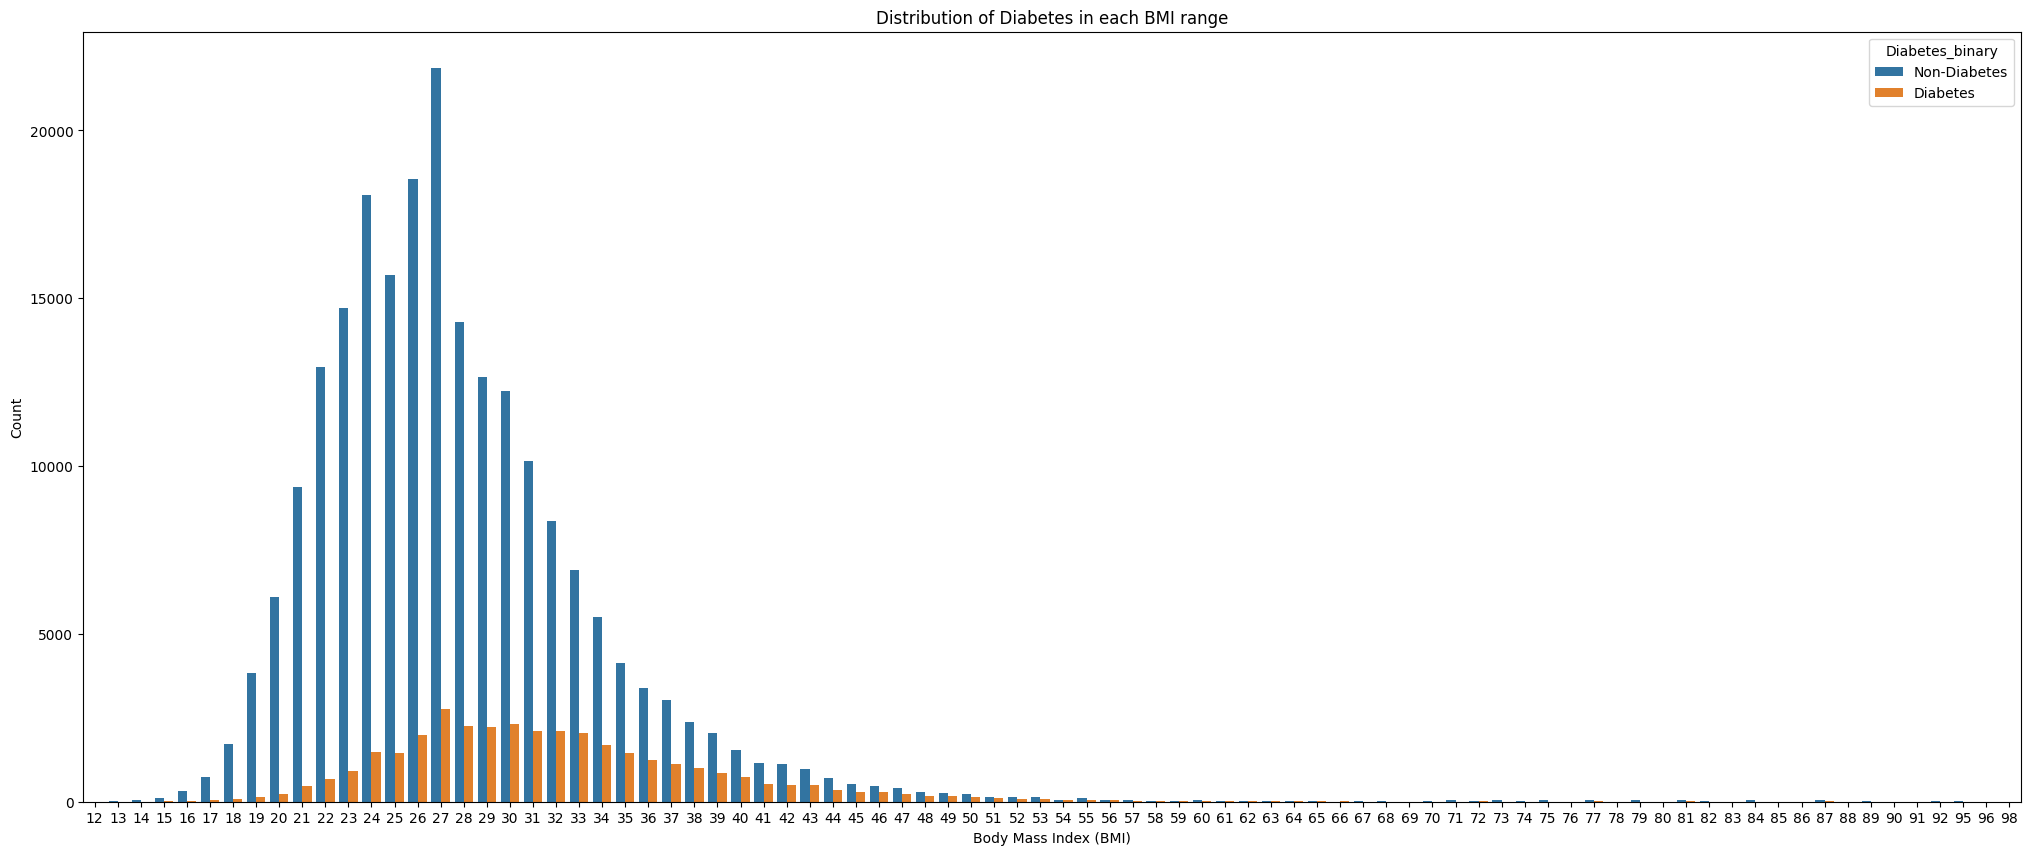

In [ ]:
# Map Diabetes_binary from index to string
bmi_diabetes_df = diabetes_df[['Diabetes_binary','BMI_idex']]
bmi_diabetes_df['BMI_index'] = bmi_diabetes_df['BMI_idex'].astype(int)
bmi_diabetes_df['Diabetes_binary'] = bmi_diabetes_df['Diabetes_binary'].apply(lambda x: 'Diabetes' if x==1 else 'Non-Diabetes')

# Plot
plt.figure(figsize=(25, 10))
sns.countplot(data=bmi_diabetes_df, x='BMI_index', hue='Diabetes_binary')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Count')
plt.title('Distribution of Diabetes in each BMI range')

From the BMI interpretation table and the distribution plot of Diabetes in each BMI range, we may draw some simple conclusion as below: 

-  We can observe that when the BMI value is in healthy range (18.5~24.9) the non-diabetes occupies the majority. Also, within this range, as the BMI increases the ratio of non-diabetes also increase. 

- When the BMI value falls into Overweight and Obesity range, we can observe that the diabetes popoulation occupies the majority and also its ratio increases as the BMI increseas. 

- Therefore, as an inexpensive and easy index, BMI does provide some insights when predicting whether one has diabetes or not. We may observe more interesting effects of BMI index later when using machine learning models to combine it with other attributes to predict the symptom of diabetes.

# Modeling

In this part, we would like to investigate the performance of several machine learning models in predicting whether one has diabetes or not given his characteristics. Since we have a binary label `Diabetes_binary` in our dataset as indicator to determine whether one has diabetes or not, we decide to try several different classification models to model this problem. 

## Preprocessing: Find feature & labels and create train & test dataset

###### Addressing class imbalance

We now processed the diabetes dataset to address class imbalance, which can lead to biased model performance. First, we removed any duplicate entries from the dataset to ensure data quality. Then, we separated the features and target variable into two DataFrames. To balance the classes, we employed the NearMiss undersampling technique, using version 1 and 10 nearest neighbors. This method selects instances from the majority class that are close to the minority class instances, effectively reducing the majority class while preserving the information from the minority class. After applying the NearMiss algorithm, we obtained balanced feature and target datasets, which can now be used for further analysis and model training.

In [ ]:
from imblearn.under_sampling import NearMiss

diabetes_df = diabetes_df.drop_duplicates()

features = diabetes_df.drop(columns=['Diabetes_binary'])
target = diabetes_df['Diabetes_binary']

nm = NearMiss(version=1, n_neighbors=10)
x_sm, y_sm = nm.fit_resample(features, target)

###### Test & Train dataset
We split the data 80/20 which means 80% of the data will be used for training, and the remaining 20% will be used for testing. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

## Principal Component Analysis  (PCA)

Principal component analysis (PCA) is a linear dimensionality reduction technique through using Singular Value Decomposition of the data to project it to a lower dimensional space. It can be used to boost machine learning model training process and also give us insight on the importance of number of features.

Since in our dataset there are 25 features, we are interested in exploring the key variables in our dataset and the feasibility to reduce dataset dimensionality to improve training speed in later modeling part.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize train dataset
scaler = StandardScaler()
scaler.fit(x_train)
# Transform
scaled_X_train = scaler.transform(x_train)
scaled_X_test = scaler.transform(x_test)

# Instantiate and Fit PCA
pca = PCA(n_components=scaled_X_train.shape[1])
pca_X_train = pca.fit_transform(scaled_X_train)
pca_X_test = pca.fit_transform(scaled_X_test)

# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

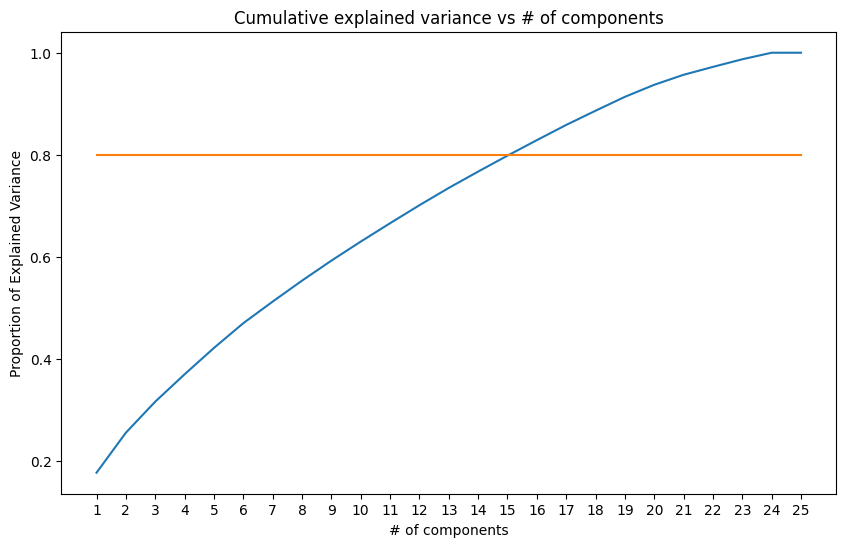

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(cum_evr)+1), cum_evr)
plt.plot(range(1,len(cum_evr)+1), [0.8]*len(cum_evr))
plt.xticks(range(1,len(cum_evr)+1))
plt.xlabel("# of components")
plt.ylabel("Proportion of Explained Variance")
plt.title("Cumulative explained variance vs # of components")
plt.show()

## Classification Models

###### Baseline Model (Logistic)
For our baseline model, we are going to fit a logistic model to predict diabetes without PCA and other advanced settings. 

Logistic regression is commonly used for binary classification cases when the target variable is binary. Logistic regression can predict the probability that whether a observation belongs to which class, based on a set of input features.

The regression has many hyperparameters that can be adjusted to control the learning progress of the model by regularization strength and the maximum number of iterations for the optimization algorithm.

The main advantage of logistic regression is that it is simple and effective way to model binary outcomes. 


<img align="center" src = "https://www.fromthegenesis.com/wp-content/uploads/2018/07/logreg_dp.jpg" width= "300"/>


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Initialize model
logis = LogisticRegression(random_state=42, max_iter=80)

logis.fit(scaled_X_train, y_train)

# get prediction 
y_pred = logis.predict(scaled_X_test)

# Score
print('Training accuracy: ',logis.score(scaled_X_train, y_train))
print('Test accuracy: ',logis.score(scaled_X_test, y_test))

logis_classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", logis_classification_report)

Training accuracy:  0.8443634820133706
Test accuracy:  0.8479060554612338
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      7129
         1.0       0.89      0.79      0.84      7007

    accuracy                           0.85     14136
   macro avg       0.85      0.85      0.85     14136
weighted avg       0.85      0.85      0.85     14136



Try hyperparameters to improved the baseline Logistic regression using the GridSearchCV function to tune the hyperparameters, followed parameters are tested: 

* the regulariztion strength `C`: regulate overfitting issue
* `penalty`: for reduce model generalization error
* `Solver`: algorithms for optimization, Liblinear is best for high dimension and large dataset. saga is another algorithm suitable for our large dataset

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1, 1, 10],
    'solver' : ['liblinear','saga']
    }
]


from sklearn.model_selection import GridSearchCV

logis = LogisticRegression(random_state=42)

find_model = GridSearchCV(logis, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

final_logis = find_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
final_logis.best_estimator_

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

The best hyperparameters returned are `C` = 1, `penalty` = l1, `solver` = liblinear

In [ ]:
# get prediction 
y_pred_logis = final_logis.predict(scaled_X_test)

log_acc = final_logis.score(scaled_X_test, y_test)

# Score
print('Training accuracy: ',final_logis.score(scaled_X_train, y_train))
print('Test accuracy: ',final_logis.score(scaled_X_test, y_test))

finallogis_classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", finallogis_classification_report)



Training accuracy:  0.8443104241095115
Test accuracy:  0.8480475382003395
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      7129
         1.0       0.89      0.79      0.84      7007

    accuracy                           0.85     14136
   macro avg       0.85      0.85      0.85     14136
weighted avg       0.85      0.85      0.85     14136



The test accuracy improved slightly from the baseline model

based on the classification report, we got the following results



*   Precision: 0.82 for class 0 and 0.89 for class 1
*   Recall: 0.90 for class 0 and 0.79 for class 1
*   F1-score: 0.86 for class 0 and 0.84 for class 1







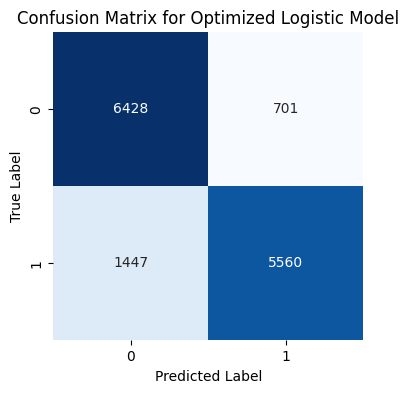

In [ ]:
#confusion matrix for logistic model
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
#cm_rf_optimal = confusion_matrix(y_test, y_pred_rf_optimal)

cm_final_logis = confusion_matrix(y_test, y_pred_logis)
plt.figure(figsize=(4,4))
sns.heatmap(cm_final_logis, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized Logistic Model')
plt.show()

The confusion matrix is used for the Logistic Model to evaluate its performance in predicting diabetes. 

Our confusion matrix for the Logistic model revealed the following results:

* True Negatives (TN): 6427 correctly predicted as non-diabetic
* True Positives (TP): 5560 correctly predicted as diabetic
* False Positives (FP): 702 non-diabetic individuals incorrectly predicted as diabetic
* False Negatives (FN): 1447 diabetic individuals incorrectly predicted as non-diabetic

The confusion matrix shows that it also performed well in distinguishing between diabetic and non-diabetic patients. 

We are going to try other types of models to see if they can perform better than the Logistic regression.

###### Decision Tree

We are interested in whether decision tree can help produce better result as it is a popular algorithm for used for classification on predicting categorical variable. Decision Tree is known for robustness to noise, missing values, redundency, and efficiency.

Decision tree model constantly splits the dataset into distinct,smaller sets to create the tree structure to make predictions until reaching pure output variables. The algorithm used to determine impurity/ entropy is imformation gain, for the attribute with highest information gain, a split criterion is chose.

<img align="center" src = "https://cdn.slidesharecdn.com/ss_thumbnails/decisiontrees-180322142751-thumbnail.jpg?width=640&height=640&fit=bounds" width= "300"/>





In [ ]:
#initialize model
tree = DecisionTreeClassifier(random_state = 0)

# GridSearch for better accuracy
pa_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

search = GridSearchCV(tree , pa_grid , cv=5)
search.fit(x_train, y_train)
tree = search.best_estimator_

#standardize the data
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

#fit model
tree.fit(x_train_scale, y_train)

#get prediction
y_pred_tree = tree.predict(x_test_scale)

#accuracy
tree_acc = accuracy_score(y_pred_tree , y_test)

#print the test accuracy 

print('Training accuracy: ',tree.score(scaled_X_train, y_train))
print('Test accuracy: ',tree.score(scaled_X_test, y_test))

Training accuracy:  0.8751370662516359
Test accuracy:  0.8588709677419355


In [ ]:
search.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, random_state=0)

The best parameters are max_depth =15 , min_samples_leaf =10, random_state = 0

Based on the parameters, the decision tree model will split the data into subsets 15times, stop splitting a leaf node with there are less than 10 samples left in the subsets to avoid overfitting.

In [ ]:
tree_classification_report = classification_report(y_test, y_pred_tree)
print("Classification Report:\n", tree_classification_report)


#f1_score_decision = finallogis_classification_report['weighted avg']['f1-score']
#recall_decision = finallogis_classification_report['weighted avg']['recall']

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      7129
         1.0       0.92      0.78      0.85      7007

    accuracy                           0.86     14136
   macro avg       0.87      0.86      0.86     14136
weighted avg       0.87      0.86      0.86     14136




based on the classification report, we got the following results



*   Precision: 0.81 for class 0 and 0.92 for class 1
*   Recall: 0.94 for class 0 and 0.78 for class 1
*   F1-score: 0.87 for class 0 and 0.85 for class 1



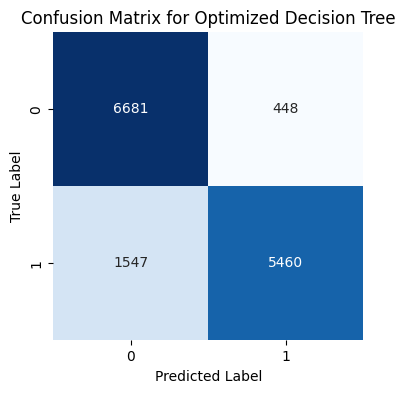

In [ ]:
#confusion matrix plot of decision tree model
cm_final_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(4,4))
sns.heatmap(cm_final_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized Decision Tree')
plt.show()

The confusion matrix is used for the Decision tree to evaluate its performance in predicting diabetes. 

Our confusion matrix revealed the following results:

* True Negatives (TN): 6,680 correctly predicted as non-diabetic
* True Positives (TP): 5,462 correctly predicted as diabetic
* False Positives (FP): 449 non-diabetic individuals incorrectly predicted as diabetic
* False Negatives (FN): 1,545 diabetic individuals incorrectly predicted as non-diabetic

The confusion matrix shows that it also performed better than the Logistic model in distinguishing between diabetic and non-diabetic patients. 

We are going to try other types of models to see if they can perform better than the Decision Tree.

###### Random Forest

We used a RandomForestClassifier to classify the diabetes dataset due to its versatility and ability to handle complex feature relationships. After training the model on scaled data, we evaluated its performance and obtained an accuracy score of 0.87. The classification report shows that the model has a well-balanced performance across both classes, with an F1-score of 0.88 for class 0 and 0.86 for class 1. This indicates that our chosen model is effectively able to classify instances in our dataset, demonstrating good precision and recall for both classes.


<img align="center" src = "https://blog.paperspace.com/content/images/2019/11/bootstrapping--6--1.png" width= "300"/>




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# creating a RF classifier with n_estimators = 100

# Instantiate and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(scaled_X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(scaled_X_test)

# the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score: ", rf_accuracy)

# display the classification report
rf_classification_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", rf_classification_report)

Accuracy Score:  0.8694114318053198
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      7129
         1.0       0.91      0.82      0.86      7007

    accuracy                           0.87     14136
   macro avg       0.87      0.87      0.87     14136
weighted avg       0.87      0.87      0.87     14136



We now perform a GridSearchCV with cross-validation to find the optimal hyperparameters for our RandomForestClassifier. We define a hyperparameter grid that includes various options for 'bootstrap', 'max_depth', and 'n_estimators'. We use 3-fold cross-validation to evaluate the performance of each combination. By setting 'n_jobs' to -1, we enable the use of all available processors for parallel computation, speeding up the search. We chose 'accuracy' as the scoring metric for the grid search. 

In [ ]:
#takes 14 mins to run
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 5, 20, 50, 100],
    'n_estimators': [10,50,100,200,300]
}

rf = RandomForestClassifier(random_state=1)

# grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1,scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 20, 50, 100],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

After fitting the grid search to the data, we obtain the optimal combination of hyperparameters for our RandomForestClassifier.

In [ ]:
grid_table = pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')
top_10 = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].head(10)
top_10.reset_index().iloc[0]['params']

{'bootstrap': False, 'max_depth': 20, 'n_estimators': 300}

In [ ]:
import random
random.seed(100)
rf_optimal = RandomForestClassifier(n_estimators = 100, max_depth = 20, bootstrap = True, random_state=1) 

rf_optimal.fit(scaled_X_train, y_train)

# Predict on the test set
y_pred_rf_optimal = rf_optimal.predict(scaled_X_test)

# the accuracy
rf_accuracy_optimal = accuracy_score(y_test, y_pred_rf_optimal)
print("Accuracy Score: ", rf_accuracy_optimal)

# display the classification report
rf_classification_report_optimal = classification_report(y_test, y_pred_rf_optimal)
print("Classification Report:\n", rf_classification_report_optimal)

Accuracy Score:  0.8720288624787776
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      7129
         1.0       0.93      0.80      0.86      7007

    accuracy                           0.87     14136
   macro avg       0.88      0.87      0.87     14136
weighted avg       0.88      0.87      0.87     14136



After retraining the Random Forest model with the optimal hyperparameters (100 trees, maximum depth of 20, and bootstrap samples), we observed an improved performance on the diabetes dataset. The accuracy score increased to 0.8746, and the classification report shows the following results:



*   Precision: 0.83 for class 0 and 0.93 for class 1
*   Recall: 0.94 for class 0 and 0.81 for class 1
*   F1-score: 0.88 for class 0 and 0.86 for class 1




Overall, the model's performance improved, achieving an accuracy of 87.46% and demonstrating a better ability for diabetes prediction.

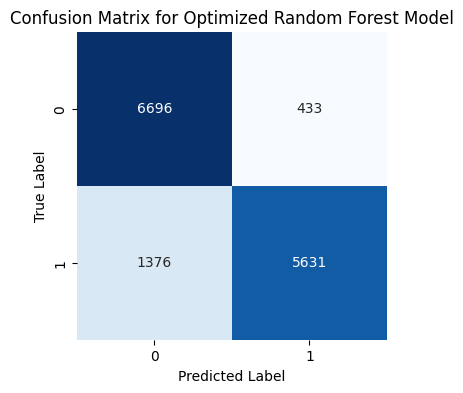

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_rf_optimal = confusion_matrix(y_test, y_pred_rf_optimal)

plt.figure(figsize=(4,4))
sns.heatmap(cm_rf_optimal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized Random Forest Model')
plt.show()

In this analysis, we constructed a confusion matrix for the Random Forest classifier with optimal hyperparameters to assess the model's performance in predicting diabetes. 

Our confusion matrix showed the following results:

* True Negatives (TN): 6,717 correctly predicted as non-diabetic
* True Positives (TP): 5,646 correctly predicted as diabetic
* False Positives (FP): 412 non-diabetic individuals incorrectly predicted as diabetic
* False Negatives (FN): 1,361 diabetic individuals incorrectly predicted as non-diabetic

The confusion matrix illustrates that our Random Forest classifier performed well in distinguishing between diabetic and non-diabetic patients. However, there is still room for improvement in minimizing the number of false negatives, as these cases represent missed opportunities for early intervention and treatment.








###### SVC Model

We also trained a Support Vector Machine (SVM) model with a linear kernel on the standardized diabetes dataset. The SVM model achieved an accuracy score of 0.8498. The classification report reveals the following performance metrics:

* Precision: 0.81 for class 0 and 0.91 for class 1
* Recall: 0.92 for class 0 and 0.77 for class 1
* F1-score: 0.86 for class 0 and 0.84 for class 1

While the SVM model performed reasonably well, with an accuracy of 84.98%, it didn't outperform the optimized Random Forest model.



<img align="center" src = "https://scikit-learn.org/stable/_images/sphx_glr_plot_semi_supervised_versus_svm_iris_thumb.png" width= "400"/>




In [ ]:
# Instantiate the SVM model
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear',random_state=42)

# Train the SVM model
svm_clf.fit(scaled_X_train, y_train)

# Predict on the standardized test data
y_pred_svm = svm_clf.predict(scaled_X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy Score: ", svm_accuracy)

svm_classification_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", svm_classification_report)

Accuracy Score:  0.8497453310696095
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      7129
         1.0       0.91      0.77      0.84      7007

    accuracy                           0.85     14136
   macro avg       0.86      0.85      0.85     14136
weighted avg       0.86      0.85      0.85     14136



In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM model
svm_clf = SVC(kernel= 'rbf', random_state=42)

# Train the SVM model
svm_clf.fit(scaled_X_train, y_train)

# Predict on the standardized test data
y_pred_svm = svm_clf.predict(scaled_X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy Score: ", svm_accuracy)

svm_classification_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", svm_classification_report)

Accuracy Score:  0.8696236559139785
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      7129
         1.0       0.93      0.79      0.86      7007

    accuracy                           0.87     14136
   macro avg       0.88      0.87      0.87     14136
weighted avg       0.88      0.87      0.87     14136



We perform hyperparameter tuning by changing the kernel of the SVM model to Radial Basis Function (RBF). The SVM model with the RBF kernel achieved an accuracy score of 0.8696. The classification report shows the following performance metrics:

* Precision: 0.82 for class 0 and 0.93 for class 1
* Recall: 0.94 for class 0 and 0.79 for class 1
* F1-score: 0.88 for class 0 and 0.86 for class 1

The SVM model with the RBF kernel performed better than the linear kernel, achieving an accuracy of 86.96%. However, it still didn't outperform the optimized Random Forest model. We will be looking into utilizing more model to acheive better accuracy.

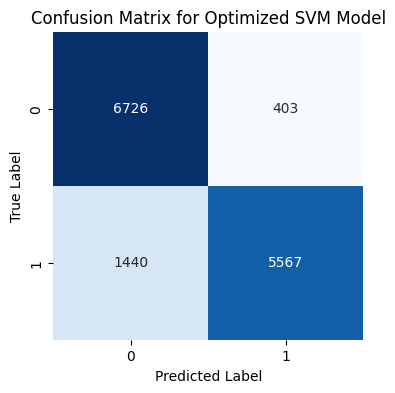

In [ ]:
# Compute the confusion matrix
cm_svm_optimal = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm_optimal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized SVM Model')
plt.show()

Similar to the Random Forest classifier, we also constructed a confusion matrix for the SVM classifier to evaluate its performance in predicting diabetes. 

Our confusion matrix for the SVM model revealed the following results:

* True Negatives (TN): 6,726 correctly predicted as non-diabetic
* True Positives (TP): 5,567 correctly predicted as diabetic
* False Positives (FP): 403 non-diabetic individuals incorrectly predicted as diabetic
* False Negatives (FN): 1,440 diabetic individuals incorrectly predicted as non-diabetic

The SVM model's confusion matrix shows that it also performed well in distinguishing between diabetic and non-diabetic patients, although it yielded a slightly higher number of false negatives compared to the Random Forest classifier. 

###### MLP Model

We also would like to try with the Multi-layer Perceptron model, which models the relation between input feature and target with many hidden layers. Since the target column in our model consists of binary variable 0 and 1, we decide to choose the sigmoid as the activation function which also models the output value to be range [0,1].

Compared with linear classification, the introduction of multi-layers and activation function enables MLP to laern non-linearity realtion within the dataset, which we think should have a overall better performance. However, we also notice some disadvantages of MLP:

- MLP with hidden layers have a non-convex loss function where there 
exists more than one local minimum. Therefore we may get different results based on the random seed we choose.

- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations. To select a proper hyperparameter it could be time consuming.

- MLP is sensitive to feature scaling. To deal with it, we first scale the train and test feature and then run the MLP model.


<img align="center" src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/ANN-Graph.gif" width= "400"/>




In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[16,8], 
                        random_state=42, 
                        max_iter=300, 
                        batch_size=128,
                        activation='logistic').fit(scaled_X_train, y_train)

# Training and test accuracy
print('Training score: ', mlp_clf.score(scaled_X_train, y_train))
print('Test score: ', mlp_clf.score(scaled_X_test, y_test))
# Classification report 
y_pred_mlp = mlp_clf.predict(scaled_X_test)
mlp_classification_report = classification_report(y_test, y_pred_mlp)
print("Classification Report:\n", mlp_classification_report)

Training score:  0.8762159102967706
Test score:  0.8739388794567062
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      7129
         1.0       0.92      0.82      0.87      7007

    accuracy                           0.87     14136
   macro avg       0.88      0.87      0.87     14136
weighted avg       0.88      0.87      0.87     14136



For the hyperparameter tuning of MLP model, we are mainly interested in exploring the effect of number of hidden layers and the L2 regularization term `alpha` on the prediction accuracy. With different number of hidden layers the model has different ability to model the non-linearity existing in the dataset and deal with the non-convex loss loss problem. Also, we are interested in applying adaptive learning rate to see whether it helps to improve model performance. The hyperparameter explanation is shown below.

* `hidden_layer_sizes`: The ith element represents the number of neurons in the ith hidden layer.
* `alpha`: Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.
* `learning_rate`: Learning rate schedule for weight updates. `constant` is a constant learning rate while `adaptive` uses default `learning_rate_init` as long as loss keeps decreasing, and divide current learning rate by 5 otherwise.

In [ ]:
mlp_parameter_space = {
    'hidden_layer_sizes': [(12,8),(18,12)],
    'alpha': [0.0001, 0.005],
    'learning_rate': ['constant','adaptive']
}
# Define MLP model
mlp_clf = MLPClassifier()
# Grid-search for best hyperparameter
mlp_tune_clf = GridSearchCV(mlp_clf, mlp_parameter_space, n_jobs=-1, cv=5)
mlp_tune_clf.fit(scaled_X_train, y_train)

# Get prediction with best parameter
y_pred_mlptuned = mlp_tune_clf.predict(scaled_X_test)
# Test accuracy
mlp_acc_test = accuracy_score(y_test, y_pred_mlptuned)
print('Test accuracy: ', mlp_acc_test)
# Classification report
mlp_classification_report = classification_report(y_test, y_pred_mlptuned)
print("Classification Report of tuned MLP:\n", mlp_classification_report)

Test accuracy:  0.8776174306734579
Classification Report of tuned MLP:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7129
         1.0       0.93      0.82      0.87      7007

    accuracy                           0.88     14136
   macro avg       0.88      0.88      0.88     14136
weighted avg       0.88      0.88      0.88     14136



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Based on the classification report of MLP model, we can find that it has following score:

* Precision: 0.84 for class 0 and 0.93 for class 1
* Recall: 0.94 for class 0 and 0.82 for class 1
* F1-score: 0.89 for class 0 and 0.87 for class 1

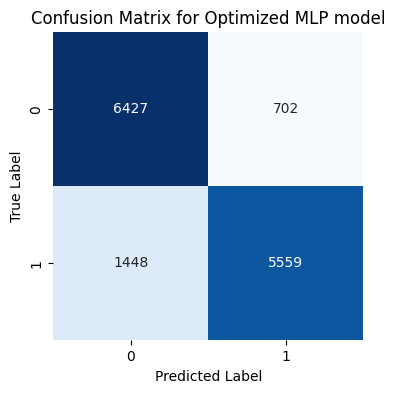

In [ ]:
cm_final_mlp = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm_final_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized MLP model')
plt.show()

Below are the confusion matrix for MLP model with optimal hyper-parameter tuning. 

* True Negatives (TN):  6618 correctly predicted as non-diabetic
* True Positives (TP):  5796 correctly predicted as diabetic
* False Positives (FP): 511 non-diabetic individuals incorrectly predicted as diabetic
* False Negatives (FN): 1211 diabetic individuals incorrectly predicted as non-diabetic

Compared with other models, the number of false negative results from MLP model is the least, indicating a lower threshold of it when predicting whether one candidate has diabetes. Therefore, if conservative response is preferred when screening whether one has diabetes or not then the MLP model is the best choice since it has the highest recall value for class 1.




###### Adaboost

Adaboost is a popular boosting ensemble method where a sequence of weak learners are fit on repeatedly modifying data. Through majority vote, the prediction from all weak learners are combined and to produce final prediction result. Through each step, those training samples that were incorrectly predicted at previous step would be given higher weight, whereas those were correctly predicted would be given lower weight. Due to this dynamically weight adjustment feature, we are curious about its performance and experiment it with our diabetes classification task.

<img align="center" src = "https://media.licdn.com/dms/image/C5612AQEcEF8up4Sq9A/article-inline_image-shrink_1000_1488/0/1589541174068?e=1685577600&v=beta&t=96UCOoUPjppL9AUd2HVmldAFUQEpnBweCv-wys8Lz1k" width= "400"/>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost_clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(scaled_X_train, y_train)
# Training and test accuracy
print('Training score: ', adaBoost_clf.score(scaled_X_train, y_train))
print('Test score: ', adaBoost_clf.score(scaled_X_test, y_test))
# Classification report 
y_pred = adaBoost_clf.predict(scaled_X_test)
ada_classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", ada_classification_report)

Training score:  0.8618018464150543
Test score:  0.8653084323712507
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      7129
         1.0       0.91      0.81      0.86      7007

    accuracy                           0.87     14136
   macro avg       0.87      0.86      0.86     14136
weighted avg       0.87      0.87      0.86     14136



For the hyperparameter tuning of Adaboost model, we are mainly interested in exploring the effect of number of estimators and learnging rate on the final prediction accuracy. The explanation for each hyperparameter is shown below.

* `n_estimators`: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
* `learning_rate`: Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier.

In [ ]:
ada_parameter_space = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.0001, 0.001, 0.01]
}
# Define MLP model
adaBoost_clf = AdaBoostClassifier()
# Grid-search for best hyperparameter
adaBoost_clf = GridSearchCV(adaBoost_clf, ada_parameter_space, n_jobs=-1, cv=5)
adaBoost_clf.fit(scaled_X_train, y_train)

# Get prediction with best parameter
y_pred_ada = adaBoost_clf.predict(scaled_X_test)
# Test accuracy
adaboost_acc_test = accuracy_score(y_test, y_pred_ada)
print('Test accuracy: ', adaboost_acc_test)
# Classification report
ada_classification_report = classification_report(y_test, y_pred_ada)
print("Classification Report of tuned Adaboost:\n", ada_classification_report)

Test accuracy:  0.8179117147707979
Classification Report of tuned Adaboost:
               precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      7129
         1.0       0.94      0.68      0.79      7007

    accuracy                           0.82     14136
   macro avg       0.84      0.82      0.81     14136
weighted avg       0.84      0.82      0.81     14136



Based on the classification report of Adaboost model, we can find that it has following score:

* Precision: 0.75 for class 0 and 0.94 for class 1
* Recall: 0.96 for class 0 and 0.68 for class 1
* F1-score: 0.84 for class 0 and 0.79 for class 1

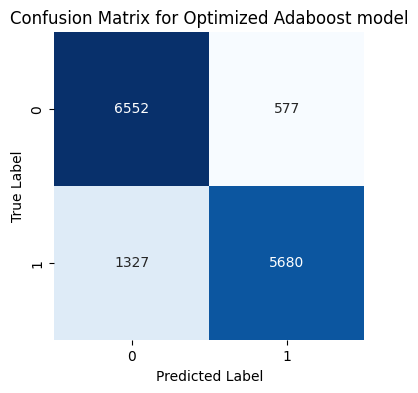

In [ ]:
cm_final_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm_final_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized Adaboost model')
plt.show()

Below are the confusion matrix for Adaboost model with optimal hyper-parameter tuning. 

* True Negatives (TN): 6552 correctly predicted as non-diabetic
* True Positives (TP): 5680 correctly predicted as diabetic
* False Positives (FP): 577 non-diabetic individuals incorrectly predicted as diabetic
* False Negatives (FN): 1327 diabetic individuals incorrectly predicted as non-diabetic

Compareed with other models Adaboost seems to have higher false negative and false positive predictions on average, which results to a lower overall accuracy.

###### Model Evaluation

In [ ]:
# create a table for the model accuracy
names  = ['Logistic', 'Decision Tree', 'Random Forest', 'SVC', 'MLP', 'Adaboost']
accuracy = [log_acc, tree_acc, rf_accuracy_optimal, svm_accuracy, mlp_acc_test, adaboost_acc_test]
fc0 = [0.86 , 0.87, 0.88,0.88,0.89,0.84    ]
fc1 = [0.84 , 0.85, 0.86,0.86,0.87,0.79    ]
rc0 = [0.90 , 0.94, 0.94,0.94,0.94,0.96    ]
rc1 = [0.79 , 0.78, 0.81,0.79,0.82,0.68  ]
# Convert model accuracy to dataframe for visualization
table = pd.DataFrame(list(zip(names, accuracy, fc0, fc1, rc0,rc1 )), columns = ['Model', 'Accuracy', 'F1-score class 0', 'F1-score class 1', 'Recall class 0', 'Recall class 1'])
table.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,F1-score class 0,F1-score class 1,Recall class 0,Recall class 1
4,MLP,0.877617,0.89,0.87,0.94,0.82
2,Random Forest,0.872029,0.88,0.86,0.94,0.81
3,SVC,0.869624,0.88,0.86,0.94,0.79
1,Decision Tree,0.858871,0.87,0.85,0.94,0.78
0,Logistic,0.848048,0.86,0.84,0.90,0.79
5,Adaboost,0.817912,0.84,0.79,0.96,0.68


Based on the accuracy table shown above, MLP method has returned the highest accuracy score using the test dataset. Therefore, we select the MLP model as our preferred choice for further analysis.



---


F1-score, Recall Interpretation

F1-score, Accuracy, and Recall are measures used to evaluate the performance of our models. F1-score is calculated as `2*(precision*recall)/(precision+recall)`, and it can illustrate the ability to 
predict positive and negative cases. Recall is the ratio of true positives to the total number of actual positives. Precision is the ratio of true positives to the total number of positive predictions. 

In the field of diabetes prediction, a high F1-score means that our model can classify diabetic or non-diabetic cases accurately. However, identifying diabetic patients is critical in the early treatment stage and preventing serious health complications for diabetic patients, thus high recall is particularly important. Aiming for a model that achieves the highest F1-score and maintains high recall is the standard for evaluating models, particularly when predicting medical conditions such as diabetes.


**Feature Importance of Random Forest Model**

In [ ]:
features=diabetes_df.copy().drop(columns='Diabetes_binary')
feature_name = list(features.columns)
importances = rf_optimal.feature_importances_
forest_importances = pd.Series(importances, index=feature_name)
forest_importances = forest_importances.sort_values(ascending=False)

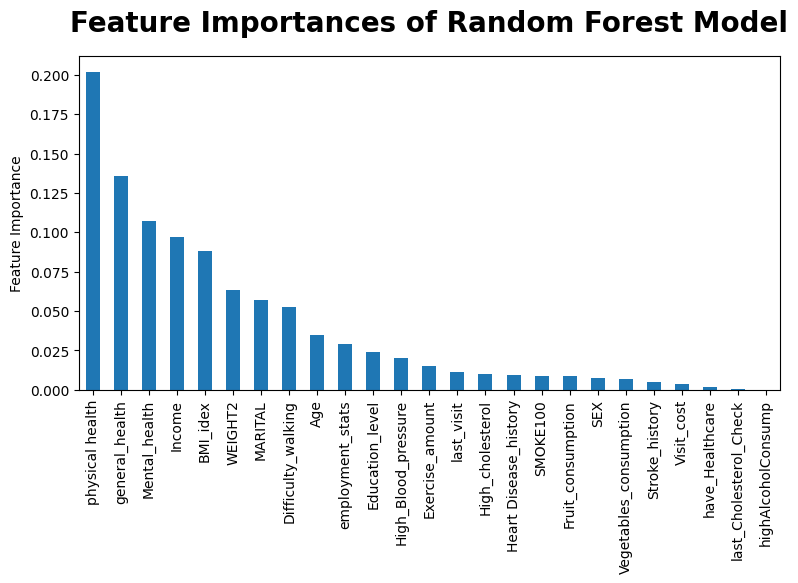

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances of Random Forest Model", 
             fontdict= { 'fontsize': 20, 'fontweight':'bold'},
             y =1.05)
ax.set_ylabel("Feature Importance")
fig.tight_layout()

**Feature Importance of MLP model**

In [ ]:
best_mlp = mlp_tune_clf.best_estimator_

# Extract weights from input layer to first hidden layer
input_weights = best_mlp.coefs_[0]

# Calculate absolute values of weights and sum over rows to get feature importances
importances = np.abs(input_weights).sum(axis=1)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
importances_sorted = importances[indices]


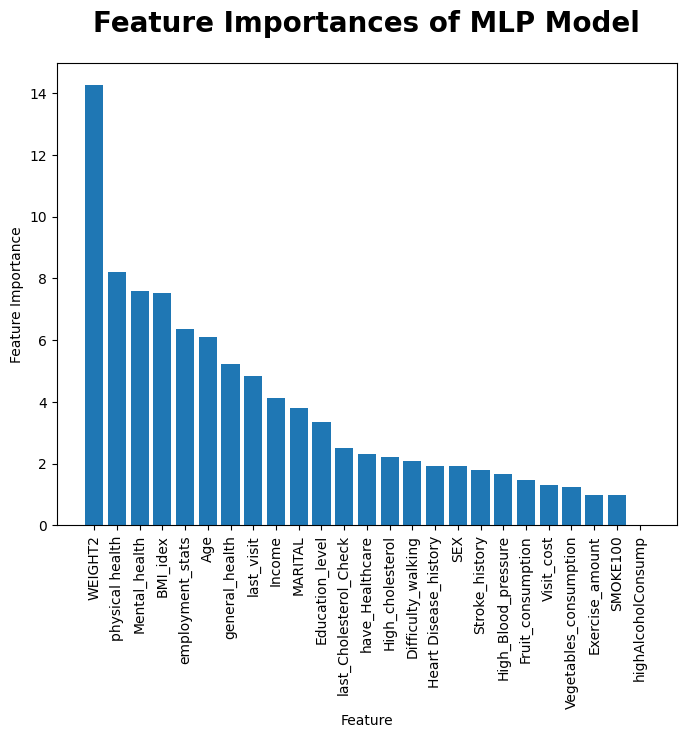

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.bar(range(features.shape[1]), importances_sorted, align='center')
plt.xticks(range(features.shape[1]), features.columns[indices], rotation=90)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
ax.set_title("Feature Importances of MLP Model", 
             fontdict= { 'fontsize': 20, 'fontweight':'bold'},
             y =1.05)
plt.show()

From the feature importance plot in both Random Forest classifier and MLP we can observe that both model consider PhysHlth, MentHlth, BMI as important feature when making predictions, indicating their importance in predicting whether one has diabetes or not. We think those features also align with intuitive explanation and medical standard, as according to the previous EDA we can also observe that BMI plays a vital role in determining whether one has diabetes or not. Those feature importance plot not only shows the important factor with respect to the model, but also provides some valuable metric for us to evaluate the potential presence of diabetes.

## Challengs and Obstacles

We ran across a number of obstacles and challenges while working on this project, which put our analytical and problem-solving abilities to the test. One significant challenge was dealing with the imbalanced dataset, which initially skewed our model predictions towards the majority class. We first tried to resolve this problem by manually adjusting the dataset. However, the resulted models did not perform that well with accuracy only around 70% even after hyperparameter tuning. To address this issue, we employed under-sampling techniques such as the NearMiss algorithm to balance the class distribution, ensuring a more accurate representation of the data and increasing the model accuracy to more than 85%.

Finding the ideal hyperparameters for our machine learning models presented another hurdle for us. To find the ideal set of hyperparameters for each model, we employ significant testing, including the use of tools like GridSearchCV. In order to enhance the functionality and interpretability of our models, we also had to choose the right feature scaling and dimensionality reduction techniques.

Finally, we tried to compare and contrast the performance of several classifiers. To acquire a better grasp of each model's strengths and limitations, we built confusion matrices and generated classification reports. Overall, these difficulties and challenges not only honed our analytical skills, but also provided significant insights into the complexity and nuances of machine learning model building and evaluation.



## Conclusion

To conclude, we have conducted a list of data exploration analysis regarding the diabetes dataset and developed several machine learning models to predict whether one might present the diabetes symptom given his/her health conditions with best 87% accuracy MLP model. Inspired by the Behavioral Risk Factor Surveillance System (BRFSS) which includes 250k data records and abundant information related to human health condition with 300+ features, we have done a preliminary study and extract only 20+ features which relates most to the diabetes symptom. Through several exploratory data analysis, we get a general idea on the correlation of each feature to the presense of diabetes symptom and find the importance of blood pressure, BMI, age etc. in predicting diabetes symptoms. We also drop off some irrelavant variables such as `highAlcoholConsump` since it doesn't correlate with any variables. With all those feature information and clear target variable, it is natural to ask whether we can fit a machine learning model and prediction whether one has diabetes or not. To do this, we first deal with the class imbalance problem with NearMiss technique get a balanced dataset. Then, after fitting several machine learning models including Random Forest Tree classifier, Multilayer Perceptron, Support Vector Classifier etc. we then analyze the model performance through computing the accuracy, precison, f-1 score. To get a visual understanding on the model performance in different classes, we have also included the confusion matrix to directly evaluate its prediction in terms of True Positive (TP), True Negative (TN), False Positive (FP) and False Negative (FP). 

For the future work, we think more features from the BRFSS survey can be included in our existing data to extend the binary classification problem to multi-class classification problem. Since there are also many common factors such as blood pressure, smoke etc. existing in many diseases, we think more versatile model can be built based on our current model to predict more than diabetes symptom can become more useful in help people diagnose potential health problems.